In [2]:
import config
import requests

import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt

from shapely.geometry import Point

In [3]:
## Need to exclude states that aren't in the continental US
df = pd.read_csv("../input/eji.csv")
fips = pd.read_csv("../input/state_fips.csv")

df_joined = df.merge(fips, left_on="statefp", right_on="STATE", how='left')
display(df_joined.head())

df_joined = df_joined[~df_joined["STATE_NAME"].isin(["Alaska"])]
df_joined = df_joined[df_joined['EP_ASTHMA'].notna()]

display(df_joined.groupby("STATE")["EP_ASTHMA"].mean())
display(df_joined["STATE"].nunique())
display(df_joined["STATE_NAME"].unique())

#df_joined[df_joined["STATE"] == 2]

C:\Users\keyasengupta\AppData\Local\Temp\ipykernel_28584\2495288979.py:2: DtypeWarning: Columns (7,8,9,10,11,12,13,81) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../input/eji.csv")


,OBJECTID,statefp,countyfp,tractce,affgeoid,geoid,name,COUNTY,StateAbbr,StateDesc,...,EPL_ASTHMA,EPL_CANCER,EPL_DIABETES,EPL_MHLTH,SHAPE__Length,SHAPE__Area,STATE,STUSAB,STATE_NAME,STATENS
0,1,1,1,20100,1400000US01001020100,1001020100,201.0,Autauga,AL,Alabama,...,0.54,0.49,0.52,0.63,"15,873.70","9,883,863.50",1,AL,Alabama,1779775
1,2,1,1,20200,1400000US01001020200,1001020200,202.0,Autauga,AL,Alabama,...,0.86,0.27,0.83,0.82,"9,764.61","3,325,691.60",1,AL,Alabama,1779775
2,3,1,1,20300,1400000US01001020300,1001020300,203.0,Autauga,AL,Alabama,...,0.72,0.52,0.66,0.77,"10,489.20","5,379,045.63",1,AL,Alabama,1779775
3,4,1,1,20400,1400000US01001020400,1001020400,204.0,Autauga,AL,Alabama,...,0.37,0.88,0.56,0.41,"12,162.23","6,355,819.12",1,AL,Alabama,1779775
4,5,1,1,20500,1400000US01001020500,1001020500,205.0,Autauga,AL,Alabama,...,0.43,0.43,0.33,0.50,"16,890.07","11,462,115.49",1,AL,Alabama,1779775


STATE
1     10.874405
4     10.551285
5     10.377810
6      9.084548
8      9.470475
9     10.370205
10     9.949533
11    11.298883
12     8.893883
13     9.807665
16     9.668350
17     9.781136
18    10.626941
19     8.776092
20     9.911827
21    11.139657
22     9.960089
23    11.351282
24     9.770000
25    10.461202
26    11.220015
27     8.671760
28    10.619423
29    10.044957
30     9.867407
31     8.800188
32     8.937206
33    10.527055
34     9.513893
35    10.393186
36    10.644818
37     9.931814
38     9.206341
39    10.170846
40    10.824379
41    11.026513
42    10.457049
44    11.690000
45     9.820000
46     9.024775
47    10.844669
48     9.150564
49     9.534471
50    10.960109
51     9.220873
53    10.084567
54    11.415876
55     9.674085
56     9.262595
Name: EP_ASTHMA, dtype: float64

49

array(['Alabama', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'District of Columbia', 'Florida',
       'Georgia', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas',
       'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts',
       'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana',
       'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico',
       'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma',
       'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype=object)

In [4]:
df_joined.groupby(["STATE", "COUNTY"])["EP_ASTHMA"].mean()
df_joined["geocoded"] = [tuple(requests.get(f"https://api.mapbox.com/geocoding/v5/mapbox.places/{df_joined.iloc[a]['COUNTY']} {df_joined.iloc[a]['STATE_NAME']} UNITED STATES.json", 
                   params={"access_token": config.api_token}).json()["features"][0]["center"]) 
                      for a in range(len(df_joined))]

In [5]:
df_joined = pd.concat([df_joined, df_joined["geocoded"].apply(pd.Series).rename(columns={0: "LON", 1: "LAT"})], axis=1)
df_joined

,OBJECTID,statefp,countyfp,tractce,affgeoid,geoid,name,COUNTY,StateAbbr,StateDesc,...,EPL_MHLTH,SHAPE__Length,SHAPE__Area,STATE,STUSAB,STATE_NAME,STATENS,geocoded,LON,LAT
0,1,1,1,20100,1400000US01001020100,1001020100,201.00,Autauga,AL,Alabama,...,0.63,"15,873.70","9,883,863.50",1,AL,Alabama,1779775,"(-86.64833, 32.53667)",-86.648330,32.536670
1,2,1,1,20200,1400000US01001020200,1001020200,202.00,Autauga,AL,Alabama,...,0.82,"9,764.61","3,325,691.60",1,AL,Alabama,1779775,"(-86.64833, 32.53667)",-86.648330,32.536670
2,3,1,1,20300,1400000US01001020300,1001020300,203.00,Autauga,AL,Alabama,...,0.77,"10,489.20","5,379,045.63",1,AL,Alabama,1779775,"(-86.64833, 32.53667)",-86.648330,32.536670
3,4,1,1,20400,1400000US01001020400,1001020400,204.00,Autauga,AL,Alabama,...,0.41,"12,162.23","6,355,819.12",1,AL,Alabama,1779775,"(-86.64833, 32.53667)",-86.648330,32.536670
4,5,1,1,20500,1400000US01001020500,1001020500,205.00,Autauga,AL,Alabama,...,0.50,"16,890.07","11,462,115.49",1,AL,Alabama,1779775,"(-86.64833, 32.53667)",-86.648330,32.536670
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72898,72827,56,43,200,1400000US56043000200,56043000200,2.00,Washakie,WY,Wyoming,...,0.29,"410,974.00","5,791,357,714.34",56,WY,Wyoming,1779807,"(-107.90298, 44.03134)",-107.902980,44.031340
72899,72828,56,43,301,1400000US56043000301,56043000301,3.01,Washakie,WY,Wyoming,...,0.42,"5,872.63","1,991,782.35",56,WY,Wyoming,1779807,"(-107.90298, 44.03134)",-107.902980,44.031340
72900,72829,56,43,302,1400000US56043000302,56043000302,3.02,Washakie,WY,Wyoming,...,0.33,"31,827.09","16,087,295.56",56,WY,Wyoming,1779807,"(-107.90298, 44.03134)",-107.902980,44.031340
72901,72830,56,45,951100,1400000US56045951100,56045951100,9511.00,Weston,WY,Wyoming,...,0.40,"371,748.34","6,102,192,170.33",56,WY,Wyoming,1779807,"(-105.239454, 44.780582)",-105.239454,44.780582


C:\Users\keyasengupta\anaconda2\envs\py38\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


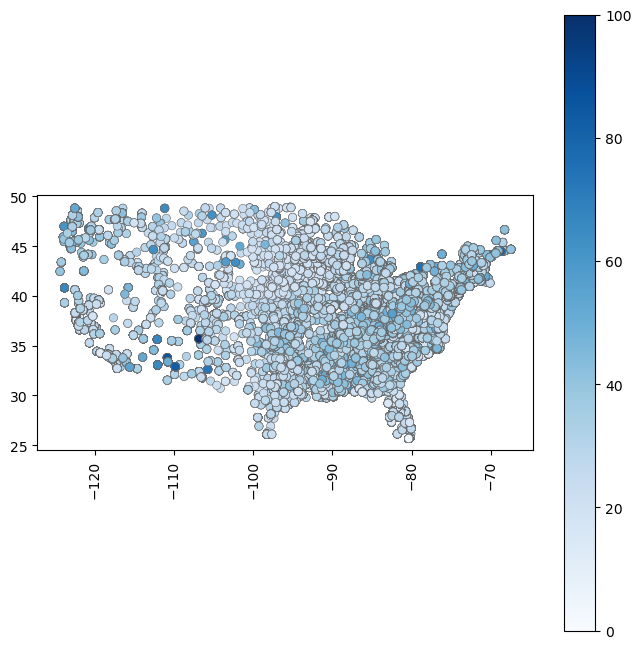

In [6]:
us_boundary = gpd.read_file("../input/s_22mr22.shp")

geom = [Point(x) for x in df_joined.geocoded]
geo_df = gpd.GeoDataFrame(df_joined, 
                          crs = {'init':'EPSG:4326'}, 
                          geometry = geom)

fig, ax = plt.subplots(1, figsize=(8, 8))
plt.xticks(rotation=90)

geo_df.plot(column="EP_ASTHMA", cmap="Blues", linewidth=0.4, ax=ax, edgecolor=".4")

bar_info = plt.cm.ScalarMappable(cmap="Blues", norm=plt.Normalize(vmin=0, vmax=100))
bar_info._A = []
cbar = fig.colorbar(bar_info)